In [1]:
from glob import glob
import re
import os, sys
import sqlite3
import pickle


folders = os.listdir("D:/BioTM/internshipfiles/comm_use.C-H.txt")
class pair:
    def __init__(self):
        self.pairs = {}
        

WindowsError: [Error 3] The system cannot find the path specified: 'D:/BioTM/internshipfiles/comm_use.C-H.txt/*.*'

In [1]:
%%time
no_text_files = 0

pattern = r"<PROTEIN>[A-Za-z0-9_  ]*</PROTEIN>"
pattern2 = r"<DNA>[A-Za-z0-9_  ]*</DNA>"
pattern3 = r"<RNA>[A-Za-z0-9_  ]*</RNA>"
pattern  = re.compile(pattern)
pattern2  = re.compile(pattern2)
pattern3 = re.compile(pattern3)
  
Main = {}
dna_frequency = {}

for folder in folders:
     file_path= "D:/BioTM/internshipfiles/comm_use.C-H.txt/" + folder
     files = glob(file_path+"/*.txt.sgml")
     
     for i in files:
          
          with open(i,"r+") as f:
               i = i.split('\\')
               i = '/'.join(i)
               s = f.read()     
              
               result = pattern.findall(s)
               result_dna = pattern2.findall(s)
               result_rna = pattern3.findall(s)
                
               
               l = len(result_rna)
               
               for i in range(l):
                  j=0
                  
                  n1 = result_rna[i][9:-10]
                  n1 = n1.strip()
                  if len(n1)==0:
                    continue
                  if n1 not in dna_frequency:
                    dna_frequency[n1]=1
                  else:
                    dna_frequency[n1]+=1
                    
                  try:
                    a = Main[n1]
                  except:
                    Main[n1] = pair()
                  
                  while(j<l):
                        
                        n2 = result_rna[j][9:-10]
                        n2 = n2.strip()
                        j+=1
                        if len(n2)==0:
                            continue
                        
                        if n1!=n2:
                            
                            if n2 not in Main[n1].pairs.keys():
                                Main[n1].pairs[n2]=1
                            else:
                                Main[n1].pairs[n2]+=1
                        j+=1
                           
                  i+=1  
               
               no_text_files+=1
        
print no_text_files

import pickle
protein_frequency ={}
pickleobj = open("MainProteinR","wb+")
pickle.dump(Main,pickleobj)  #pickled prteinset
pickleobj.close()

pickleobj = open("NameRNA","wb+")
pickle.dump(dna_frequency,pickleobj)  #pickled prteinset
pickleobj.close()


NameError: name 're' is not defined

In [17]:
%%time
from __future__ import division
import pickle

class pair:
    def __init__(self):
        self.pairs = {}
        
p = open("Nameprotein","r+")
protein_frequency = pickle.load(p)
p.close()

p = open("MainProtein","r+")
Main = pickle.load(p)
p.close()


print len(protein_frequency)
graph_protein_frequency = {}

24332
Wall time: 11.7 s


In [16]:
%%time
for i,j in Main.iteritems():
    for l,m in j.pairs.iteritems():
        print i,l,m/(protein_frequency[i]*protein_frequency[l])
        
        

Wall time: 257 ms


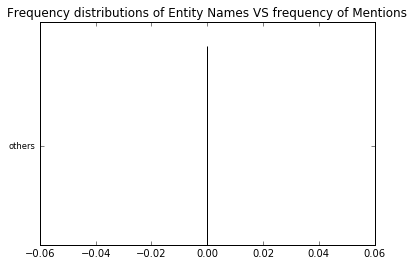

Wall time: 216 ms


In [9]:
%%time
x=[]
y=[]
other=0
for i,j in protein_frequency.iteritems():
    
     if (j>100):
         x.append(i)
         y.append(j)
     else:
        other+=1
        
x.append("others")
y.append(other)

import matplotlib.pyplot as plt

plt.title('Frequency distributions of Entity Names VS frequency of Mentions')
plt.barh(range(len(y)), y, align='center')
plt.yticks(range(len(y)), x, size='small')
plt.show()

In [20]:


png = open("plotNew.dot","w+")
png.write("graph{\n")

for i,j in protein_frequency.iteritems():
       if len(i)<25:
            if j>300:
                
                st = "\"%s\"[shape=circle]\n"%(i)
            elif(j<30):
                continue
            else:
                st = "\"%s\"[shape=point]\n"%(i)
            png.write(st)
        
            

print 'semi-completed'


oo=0
for i,j in Main.iteritems():
    if len(i.strip())!=0:
        for l,m in j.pairs.iteritems():
              if len(l.strip())!=0:
 
                    #if(protein_frequency[i]>10 and protein_frequency[l]>10):
                    if(protein_frequency>30):
                        p = m/(protein_frequency[i]*protein_frequency[l])
                        
                        oo+=1
                        if p>=0.9:
                            st = "\"%s\"--\"%s\"[label=\"%.2f\",weight=\"%.2f\"]\n"%(i,l,p,p)
                           #print st
                            png.write(st)


png.write("}")
png.close()
print 'completed'
print oo        

semi-completed
completed
614700


In [40]:
d = "abc"
d[:-1]

'ab'

In [54]:
import pickle
p = open("MainProteinD","r")
Main = pickle.load(p)
p.close()

p = open("NameDNA","r")
dna_frequency = pickle.load(p)
p.close()

In [61]:
%%time
from __future__ import division


png = open("plotD.dot","w+")
png.write("graph{\n")
oo=0
for i,j in Main.iteritems():
    for l,m in j.pairs.iteritems():
            
        if(dna_frequency[i]>5 and dna_frequency[l]>5):
            p = m/(dna_frequency[i]*dna_frequency[l])
            if p>0.1:
                oo+=1
                
                st = '%s--%s[label="%f",weight="%f"]\n'%(i[:-1],l[1:],p,p)
                #print st
                png.write(st)
            
png.write("}")
png.close()
print oo

16
Wall time: 14 ms


In [69]:
import pickle
p = open("MainProteinR","r")
Main = pickle.load(p)
p.close()

p = open("NameRNA","r")
rna_frequency = pickle.load(p)
p.close()



{}


In [68]:
%%time
from __future__ import division


png = open("plotR.dot","w+")
png.write("graph{\n")
oo=0
for i,j in Main.iteritems():
    
    for l,k in j.pairs.iteritems():
            
        if(dna_frequency[i]>5 and dna_frequency[l]>5):
            p = k/(dna_frequency[i]*dna_frequency[l])
            if p>0.1:
                oo+=1
                st = '%s--%s[label="%f",weight="%f"]\n'%(i[:-1],l[1:],p,p)
                #print st
                png.write(st)
            
png.write("}")
png.close()
print oo

KeyError: 'm'